<a href="https://colab.research.google.com/github/Lefteris97/COVID-19-Analysis-and-Visualization-with-GeoPandas/blob/main/COVID_19_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 Data Analysis and Visualization with GeoPandas**

# **Imports**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from PIL import Image
from scipy.signal import find_peaks
from matplotlib.ticker import ScalarFormatter

# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

## **Mount Drive / Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
confirmed_df = pd.read_csv('/content/drive/MyDrive/covid_data/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('/content/drive/MyDrive/covid_data/time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('/content/drive/MyDrive/covid_data/time_series_covid_19_recovered.csv')

# **Understand the Data**

## **Covid19 Confirmed**

In [ ]:
confirmed_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [ ]:
confirmed_df.shape

(276, 498)

In [ ]:
duplicates = confirmed_df[confirmed_df.duplicated()]

duplicates

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21


## **Covid19 Deaths**

In [ ]:
deaths_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,72699,73391,73688,74063,74480,75056,75588,76135,76693,77108
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,4364,4371,4386,4392,4394,4400,4411,4416,4423,4428
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


In [ ]:
deaths_df.shape

(276, 498)

In [ ]:
deaths_df.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
266,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,127701,127710,127716,127721,127724,127739,127748,127758,127768,127775
267,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,3691,3760,3811,3871,3922,3973,4022,4066,4118,4176
268,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,676,678,680,680,680,682,684,685,687,688
269,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
270,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,2465,2483,2499,2513,2528,2544,2559,2576,2595,2615
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276
275,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,1585,1586,1586,1586,1586,1587,1589,1592,1592,1594


In [ ]:
duplicates = deaths_df[deaths_df.duplicated()]

duplicates

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21


## **Covid19 Recovered**

In [ ]:
recovered_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1188,1188,1192,1192,1200,1200,1200,1200,1206,1206
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3035134,3060145,3083298,3106949,3133183,3157660,3181288,3219474,3252843,3288467
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,209980,210464,210835,211057,211375,211634,211957,212265,212566,212752
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
recovered_df.shape

(261, 498)

In [ ]:
recovered_df.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
251,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,219277,222003,224787,227531,230641,233629,236292,239309,242661,246321
253,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,93071,93339,93633,93930,94143,94385,94683,94952,95250,95529
254,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
255,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,203523,204615,205575,206921,208218,209495,210435,211288,212199,213365
256,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594
260,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,36427,36435,36445,36453,36471,36517,36531,36541,36563,36578


In [ ]:
duplicates = recovered_df[recovered_df.duplicated()]

duplicates

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21


## **Total Cases**

In [ ]:
#Combine the 3 dfs
combined_df = pd.concat([confirmed_df, deaths_df, recovered_df], axis=0)

#Create Total Cases df
total_cases_df = combined_df.groupby('Country/Region', as_index=False).agg({'5/29/21':'sum', 'Lat':'mean', 'Long':'mean'})

#Rename the columns
total_cases_df = total_cases_df.rename(columns={'5/29/21': 'TotalCases', 'Lat': 'MeanLat', 'Long': 'MeanLong'})

In [ ]:
total_cases_df.shape

(193, 4)

In [ ]:
#Total number of all the unique countries in the df
total_cases_df['Country/Region'].nunique()

193

In [ ]:
#Array with all the unique values for 'Country/Region'
unique_countries = total_cases_df['Country/Region'].unique()

In [ ]:
unique_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

As we can see from the columns of our data the complete time span is from 1/22/20 to 5/29/21 (date format : month/day/year)

# **Data Visualization with GeoPandas**

## **Preparing the Dataframes**

In [ ]:
#Preparing dfs for task 4 & 5

dfs = [confirmed_df, deaths_df, recovered_df]

# Function to aggregate and process a DataFrame
def process_df(df):
    date_columns = df.columns[4:]

    # Define aggregation functions
    agg_functions = {column: 'sum' for column in date_columns}
    agg_functions.update({'Lat': 'mean', 'Long': 'mean'})

    # Group the DataFrame by 'Country/Region' column and use the aggregation functions
    grouped_df = df.groupby(['Country/Region'], as_index=False).agg(agg_functions)

    # Rename columns 'Lat' and 'Long'
    grouped_df = grouped_df.rename(columns={'Lat': 'MeanLat', 'Long': 'MeanLong'})

    return grouped_df

# Variables to store the processed DataFrames
grouped_confirmed_df = process_df(confirmed_df)
grouped_deaths_df = process_df(deaths_df)
grouped_recovered_df = process_df(recovered_df)

# Print the processed DataFrames
# print(grouped_confirmed_df.head())
# print(grouped_deaths_df.head())
# print(grouped_recovered_df.head())

## **COVID-19 World Map**

In [ ]:
#Initialize world for plots

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude 'Antarctica' and 'Fr. S. Antarctic Lands' from world map visualization
world = world[(world.name != 'Antarctica') & (world.name != 'Fr. S. Antarctic Lands')]

<ipython-input-7-f21c085e78e5>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Create GeoDataframe for each DataFrame
# Add 'Continent' column to each DataFrame

def create_geo(df):
  # Create a GeoSeries of Point objects using mean longitude and latitude columns
  geometry = gpd.points_from_xy(df.MeanLong, df.MeanLat)
  # Create a GeoDataFrame
  geo_df = gpd.GeoDataFrame(df, geometry=geometry)

  for index, row in geo_df.iterrows():
    # Get the country name
    country = row['Country/Region']
    # Find the matching row in the 'world' GeoDataFrame based on the country name
    matching_row = world[world['name'] == country]

    # If a matching row is found
    if not matching_row.empty:
      # Get the continent value from the matching row
      continent = matching_row['continent'].values[0]
      # Assign the continent value to the 'Continent' column of the current row
      geo_df.loc[index, 'Continent']  = continent

  return geo_df

geo_confirmed_df = create_geo(grouped_confirmed_df)
geo_deaths_df = create_geo(grouped_deaths_df)
geo_recovered_df = create_geo(grouped_recovered_df)

# Print Geo DataFrames
# print(geo_confirmed_df.head(2))
#print(geo_deaths_df.head(2))
#print(geo_recovered_df.head(2))

In [ ]:
# Function to create the COVID-19 maps

def make_maps(df, target_date, thres_value, continent='', title='', task=''):

    thres_df = df[(df[target_date] > thres_value) & (df['Continent'] == continent)]

    if continent == 'Europe':
      scale_val = 0.0001
      target_crs = 'EPSG:3035'

      ax = world.to_crs(target_crs)[world.continent == continent]
      ax = ax[(ax.name != 'Russia') & (ax.name != 'Iceland')]

      ax = ax.plot(color='gray', edgecolor='black', figsize=(15,15))

      xmin, ymin, xmax, ymax = 2.2e6, 1e6, 6.8e6, 5.8e6
      ax.set_xlim(xmin, xmax)
      ax.set_ylim(ymin, ymax)

    elif (continent == 'Asia' or continent == 'South America' or continent == 'Africa' or continent == 'North America' or continent == 'Oceania'):
      scale_val = 0.0001

      if continent == 'Africa' or continent == 'North America':
        scale_val = 0.001

      target_crs = 'EPSG:4326'
      ax = world.to_crs(target_crs)[world.continent == continent]

      if continent == 'North America':
        ax = ax[ax.name != 'Greenland']

      ax = ax.plot(color='gray', edgecolor='black', figsize=(15,15))

      if continent == 'Oceania':
        scale_val = 0.01

        xmin, ymin, xmax, ymax = 110, -50, 185, 0
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)

    else:
      scale_val = 0.00001
      thres_df = df[df[target_date] > 100]

      target_crs = 'EPSG:3857'
      ax = world.to_crs(target_crs)

      ax = ax.plot(color='gray', edgecolor='black', figsize=(15,15))

    ax.set_facecolor('lightblue')

    if not thres_df.empty:

        v = np.log10(thres_df[target_date])

        points = gpd.GeoDataFrame(thres_df, geometry=gpd.points_from_xy(thres_df['MeanLong'], thres_df['MeanLat']), crs='EPSG:4326')
        points = points.to_crs(target_crs)

        if title == 'Recovered Cases' or title == 'EU Recovered Cases' or title == 'NA Recovered Cases' or title == 'SA Recovered Cases' or title == 'OCE Recovered Cases' or title == 'Africa Recovered Cases' or title == 'Asia Recovered Cases':
          ax = points.plot(ax=ax, alpha=0.8, markersize=thres_df[target_date]*v*scale_val, column=thres_df[target_date], cmap='YlGn', legend=True, legend_kwds={"orientation": "horizontal"})
        else:
          ax = points.plot(ax=ax, alpha=0.8, markersize=thres_df[target_date]*v*scale_val, column=thres_df[target_date], cmap='OrRd', legend=True, legend_kwds={"orientation": "horizontal"})

        #Hide axis labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        plt.title(title + '\n' + target_date)

        # For Animated Plots (task 5)
        if task==5:
          directory_path = f'./frames/{continent}/{title}'
          if not os.path.exists(directory_path):
              os.makedirs(directory_path)

          filename = target_date.replace('/', '_')
          filepath = f'{directory_path}/{filename}.png'
          plt.savefig(filepath)
          plt.close()
        else:
          plt.show()
    else:
        print('No values to plot!')

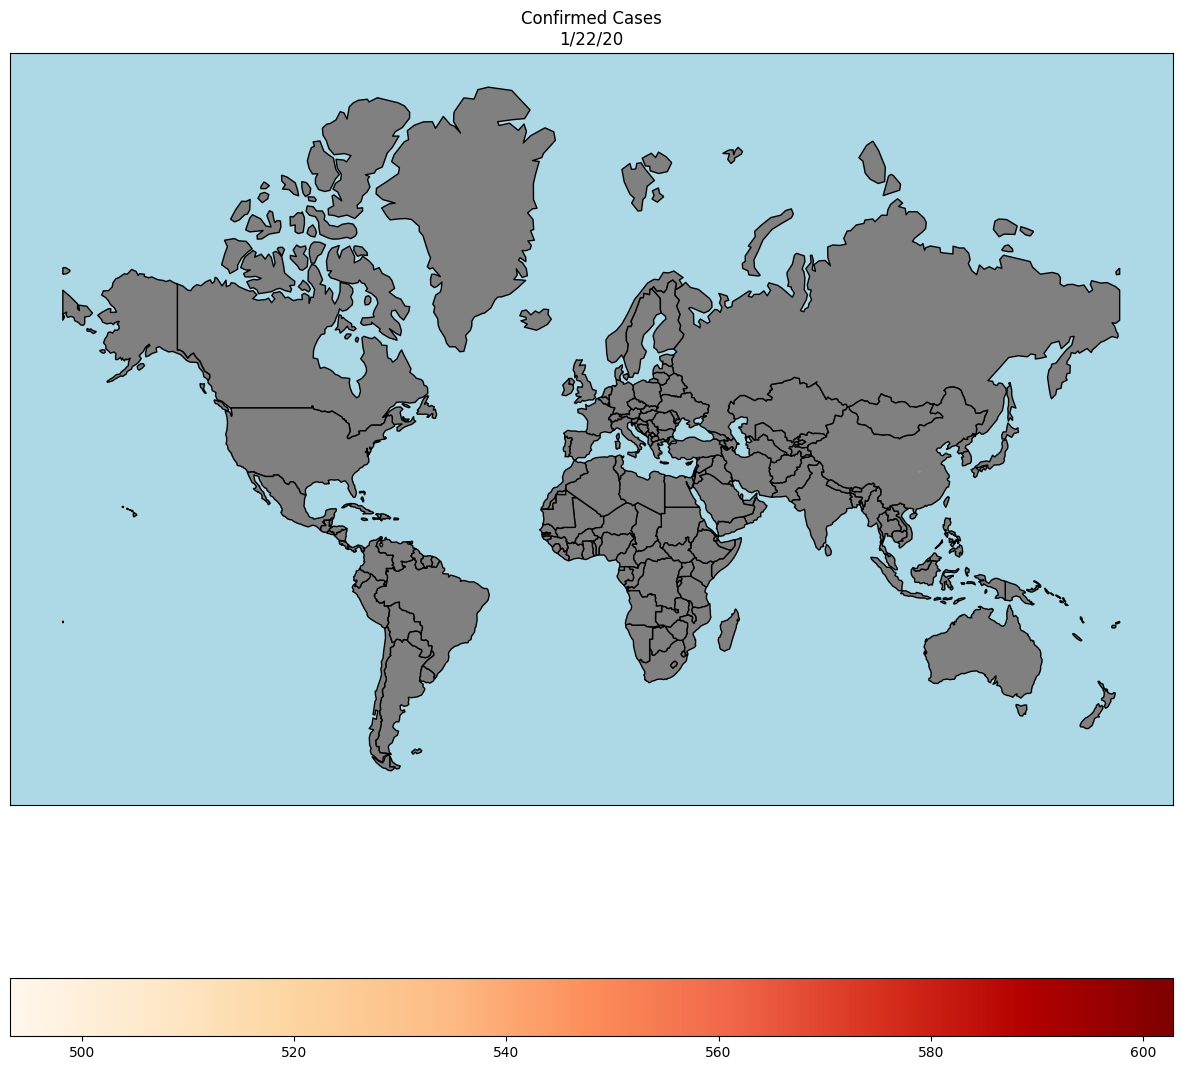

No values to plot!
No values to plot!


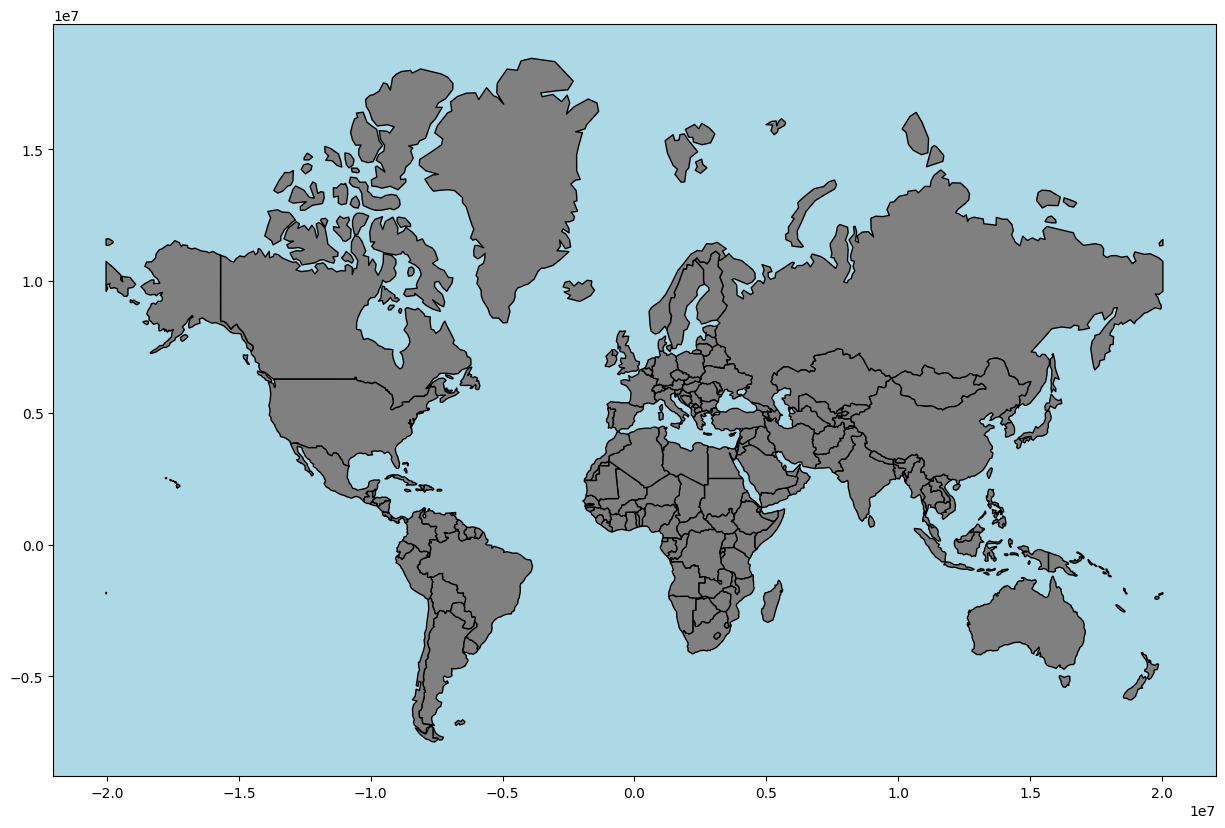

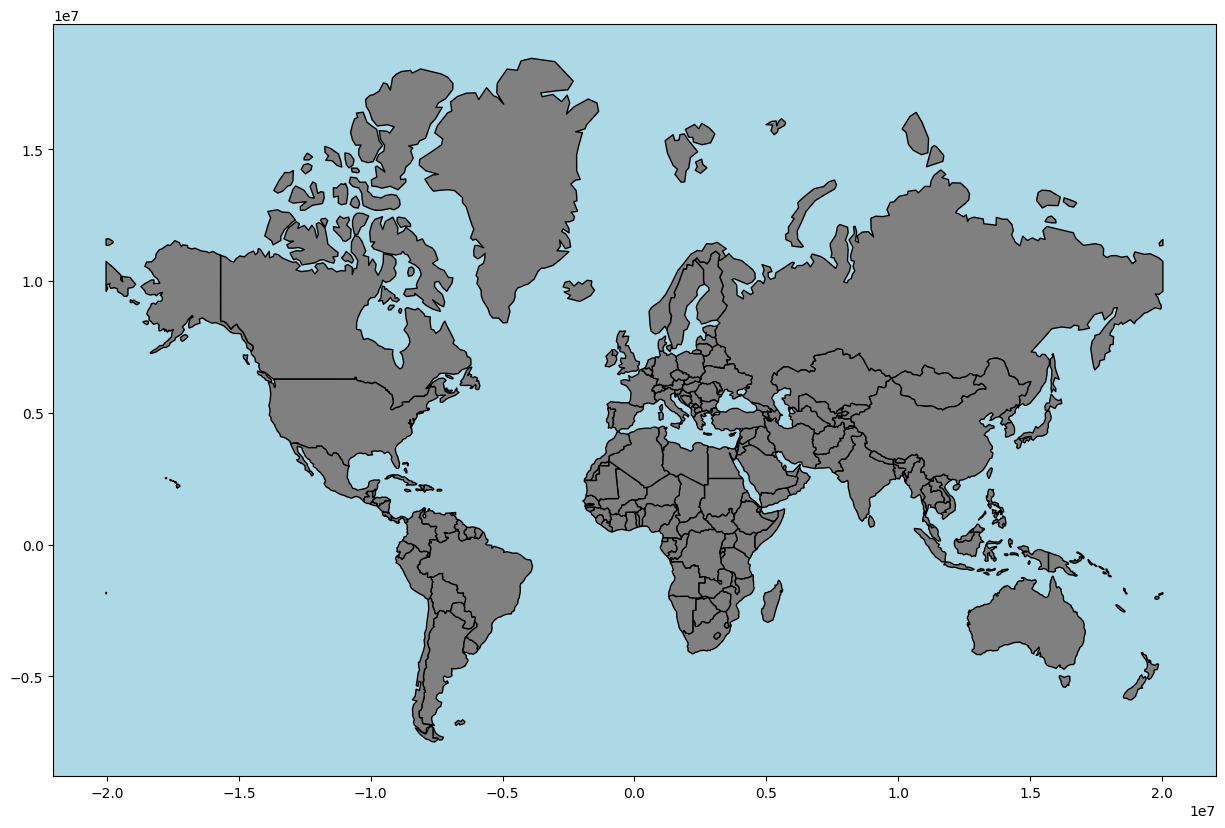

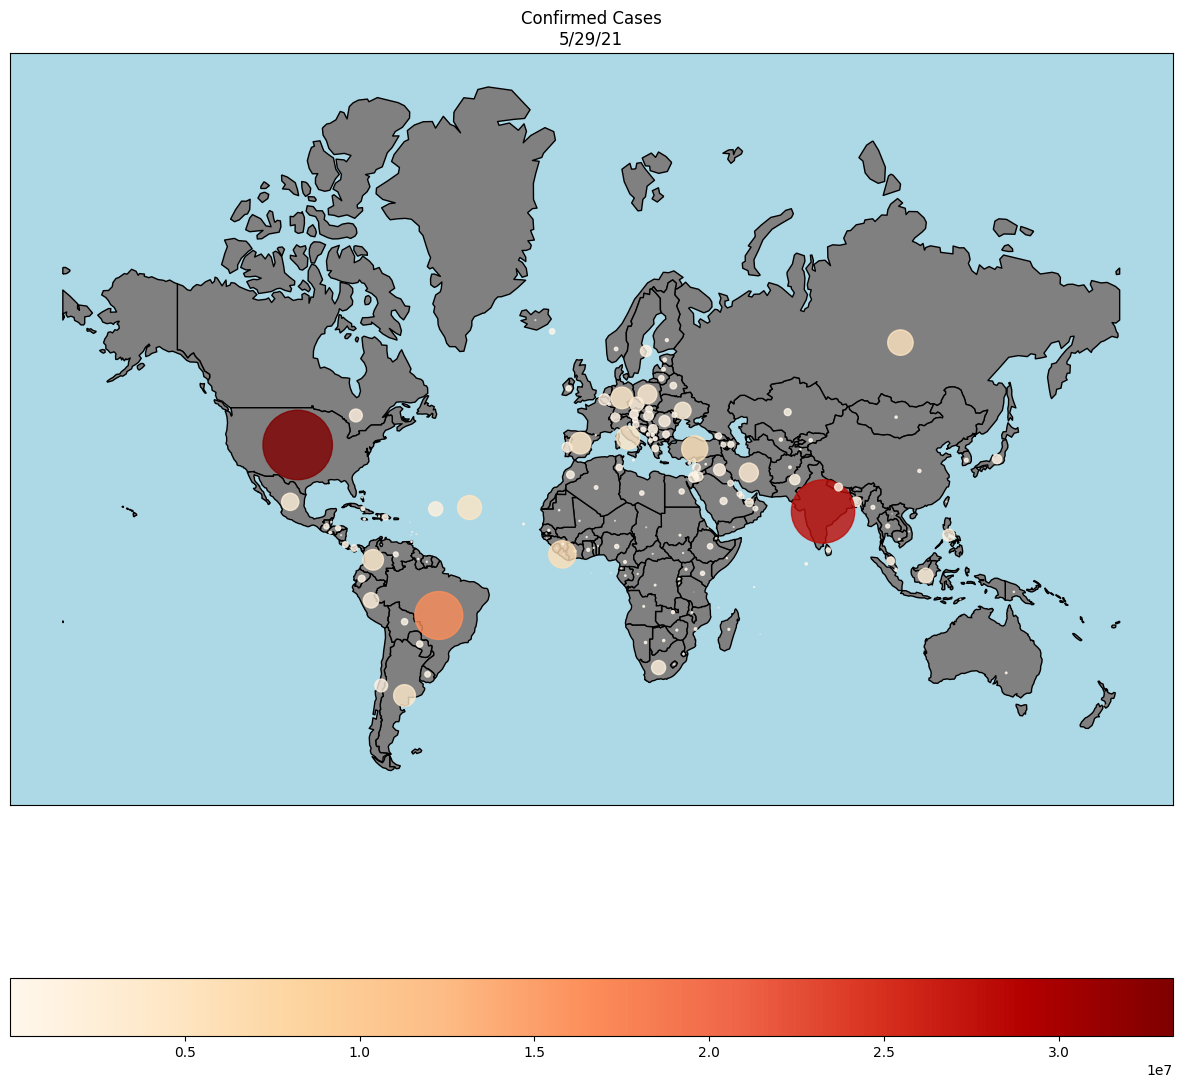

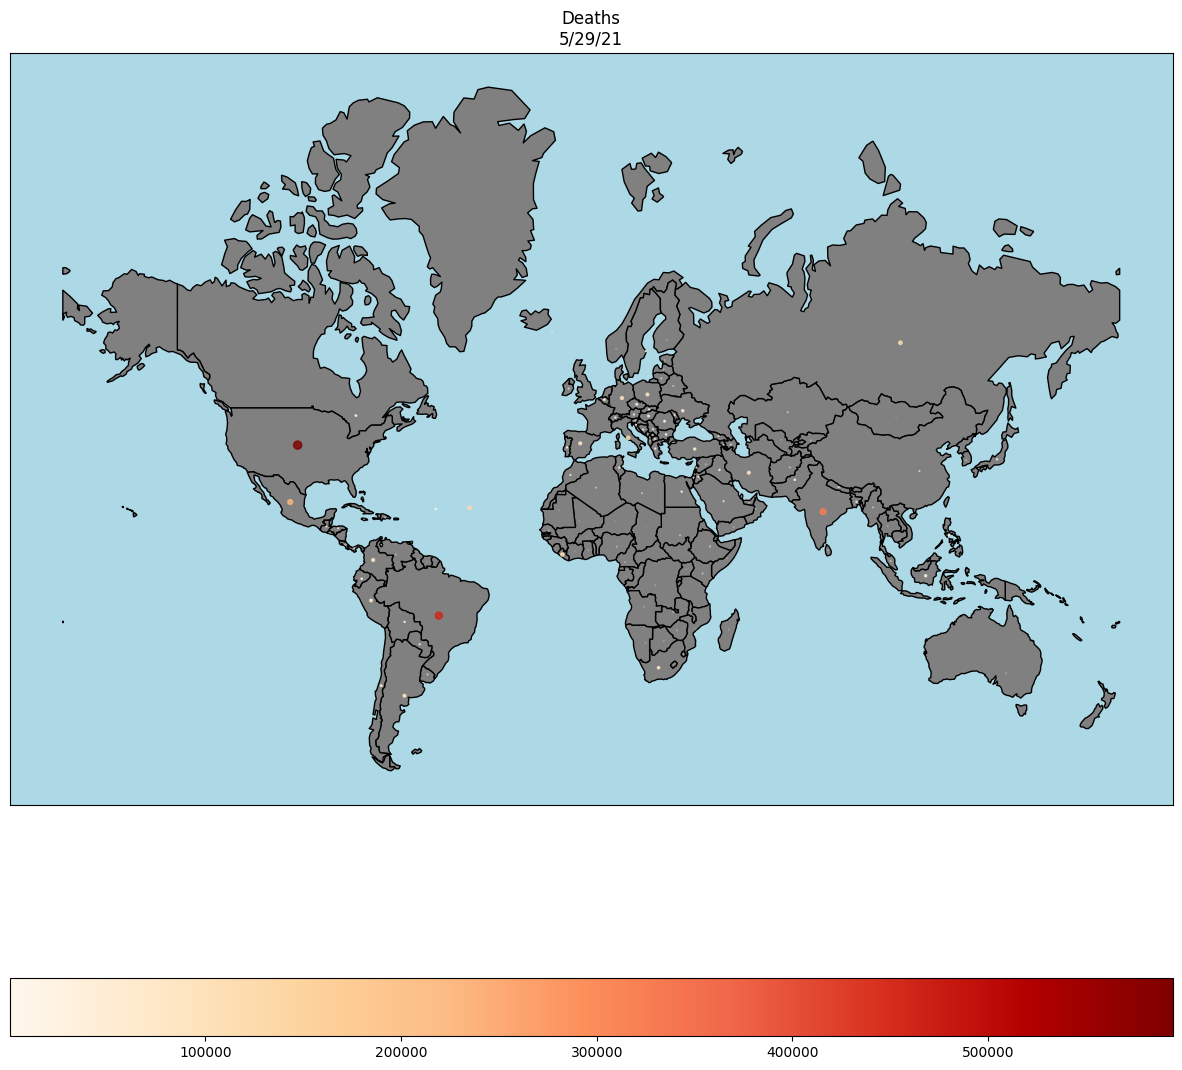

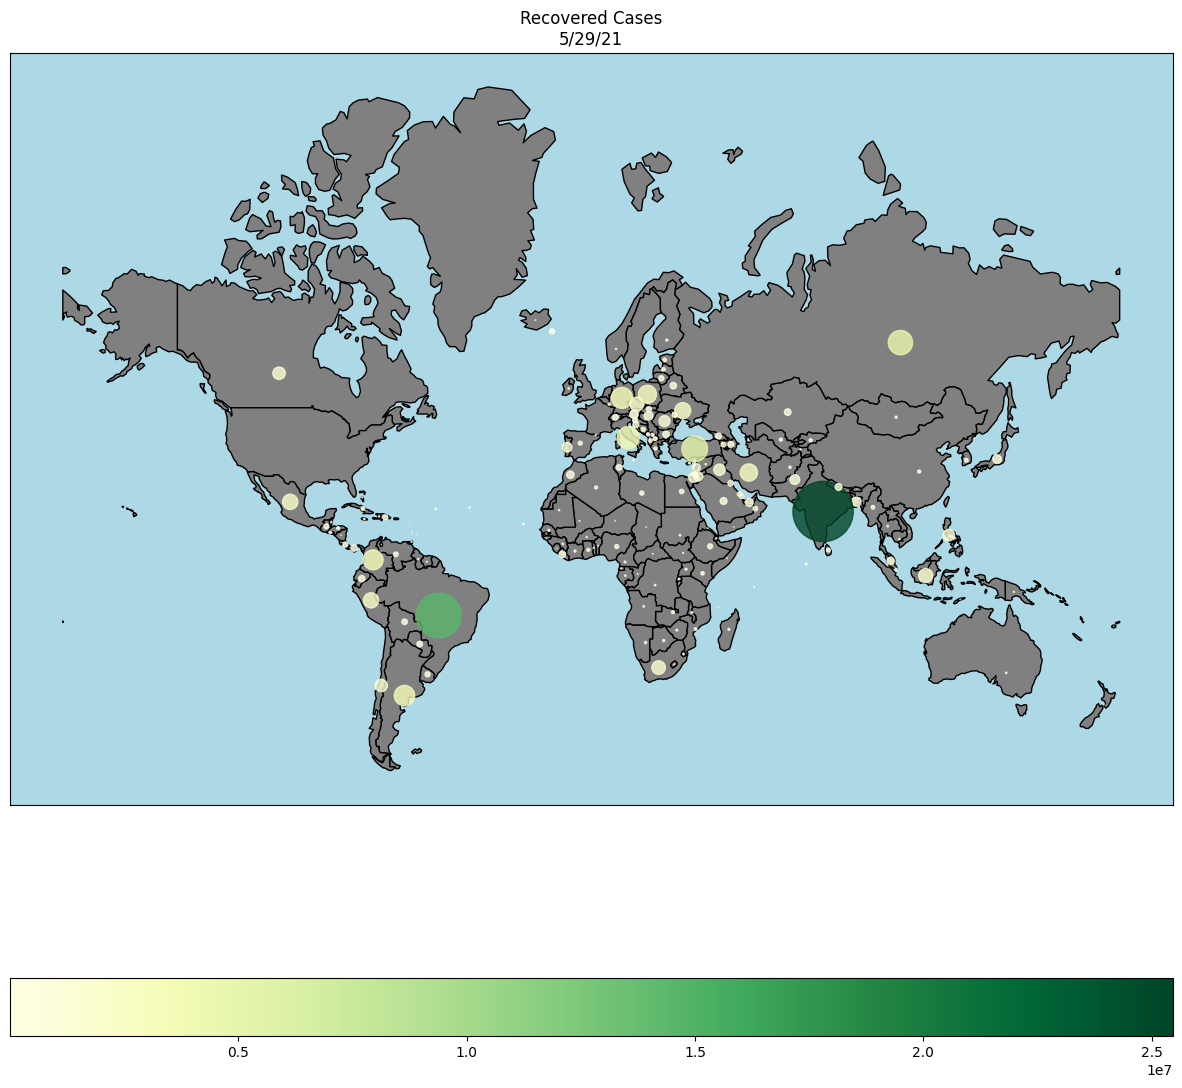

In [ ]:
# You can adjust the treshold values here. Default threshold value for all the plots is 0.
confirmed_cases_thres = 0
deaths_thres = 0
recovered_cases_thres = 0

# World Maps:
# First day of pandemic:
make_maps(geo_confirmed_df, '1/22/20', confirmed_cases_thres, '', 'Confirmed Cases')
make_maps(geo_deaths_df, '1/22/20', deaths_thres, '', 'Deaths') # no values to plot
make_maps(geo_recovered_df, '1/22/20', recovered_cases_thres, '', 'Recovered Cases') # no values to plot

# Last day of available data:
make_maps(geo_confirmed_df, '5/29/21', confirmed_cases_thres, '', 'Confirmed Cases')
make_maps(geo_deaths_df, '5/29/21', deaths_thres, '', 'Deaths')
make_maps(geo_recovered_df, '5/29/21', recovered_cases_thres, '', 'Recovered Cases')

# Continents Maps:
# Europe:
# First day of pandemic:
# make_maps(geo_confirmed_df, '1/22/20', confirmed_cases_thres, 'Europe', 'Confirmed Cases')
# make_maps(geo_deaths_df, '1/22/20', deaths_thres, 'Europe', 'Deaths')
# make_maps(geo_recovered_df, '1/22/20', recovered_cases_thres, 'Europe', 'EU Recovered Cases')

# Last day of available data:
# make_maps(geo_confirmed_df, '5/29/21', confirmed_cases_thres, 'Europe', 'Confirmed Cases')
# make_maps(geo_deaths_df, '5/29/21', deaths_thres, 'Europe', 'Deaths')
# make_maps(geo_recovered_df, '5/29/21', recovered_cases_thres, 'Europe', 'EU Recovered Cases')

# Asia:
# First day of pandemic:
# make_maps(geo_confirmed_df, '1/22/20', confirmed_cases_thres, 'Asia', 'Confirmed Cases')
# make_maps(geo_deaths_df, '1/22/20', deaths_thres, 'Asia', 'Deaths')
# make_maps(geo_recovered_df, '1/22/20', recovered_cases_thres, 'Asia', 'Asia Recovered Cases')

# Last day of available data:
# make_maps(geo_confirmed_df, '5/29/21', confirmed_cases_thres, 'Asia', 'Confirmed Cases')
# make_maps(geo_deaths_df, '5/29/21', deaths_thres, 'Asia', 'Deaths')
# make_maps(geo_recovered_df, '5/29/21', recovered_cases_thres, 'Asia', 'Asia Recovered Cases')

# Similarly for the rest of the continents ('Africa', 'South America', 'Oceania', 'North America')

## **Animated COVID-19 Maps**

In [ ]:
def animated_plot(df, thres_value, continent='', title='', task=5):

    for i in range(1, 494): #494
        date = df.columns[i]
        make_maps(df, date, thres_value, continent=continent, title=title, task=task)

In [ ]:
# Animated plots for world:
animated_plot(geo_confirmed_df, 0, 'world', 'Confirmed Cases')
# animated_plot(geo_deaths_df, 0, 'world', 'Death Cases')
# animated_plot(geo_recovered_df, 0, 'world', 'Recovered Cases')

# Animated plots for Europe:
# animated_plot(geo_confirmed_df, 0, 'Europe', 'EU Confirmed Cases')
# animated_plot(geo_deaths_df, 0, 'Europe', 'EU Death Cases')
# animated_plot(geo_recovered_df, 0, 'Europe', 'EU Recovered Cases')

# Similarly for the rest of the continents (Asia, Africa, North America, South America, Oceania)

In [ ]:
# Depending on the GIF you want to create, you'll need to adjust the file path accordingly

frames = []
imgs = glob.glob('./frames/world/Confirmed Cases/*.png')
imgs.sort(key=os.path.getmtime)

for i in imgs:
  new_frame = Image.open(i)
  frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('./frames/world/confirmed_cases.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=200, loop=0)

## **Top COVID-19 Cases**

In [ ]:
def create_top(df):
  sorted = df.sort_values(by='5/29/21', ascending=False).head(10)
  sorted_df = sorted.drop(['MeanLat', 'MeanLong'], axis=1)

  return sorted_df

top_confirmed_df = create_top(grouped_confirmed_df)
top_deaths_df = create_top(grouped_deaths_df)
top_recovered_df = create_top(grouped_recovered_df)

In [ ]:
def make_barplots(df, title):

  plt.barh(df['Country/Region'], df['5/29/21'], color='lightblue')

  plt.xlabel(title)

  formatter = ScalarFormatter(useMathText=True)

  plt.gca().xaxis.set_major_formatter(formatter)

  plt.gca().invert_yaxis()

  plt.title('COVID-19 ' + title + ' by Country/Region - Top 10\nAs of 29-May-2021')
  plt.show()

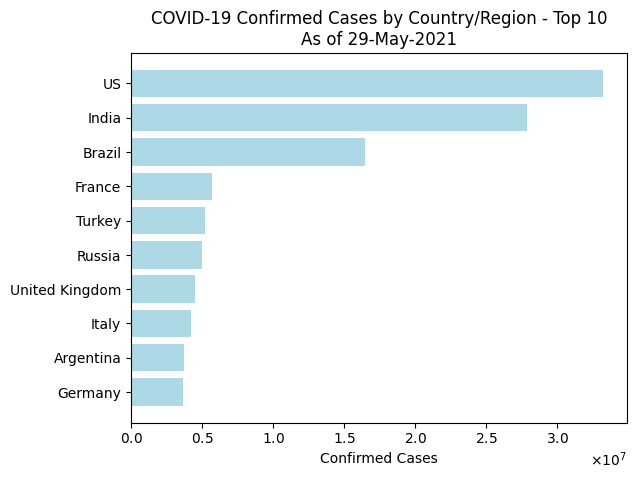

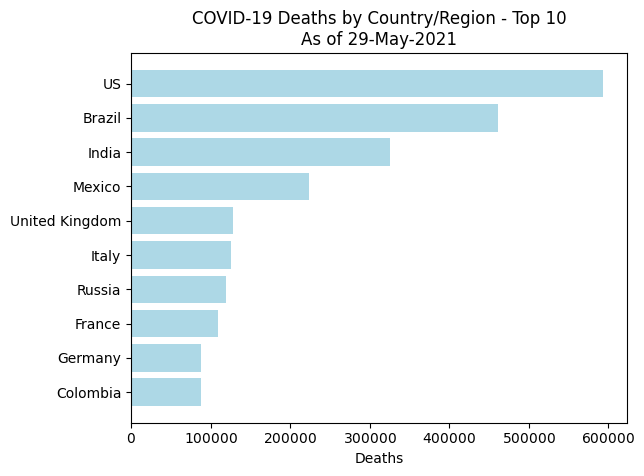

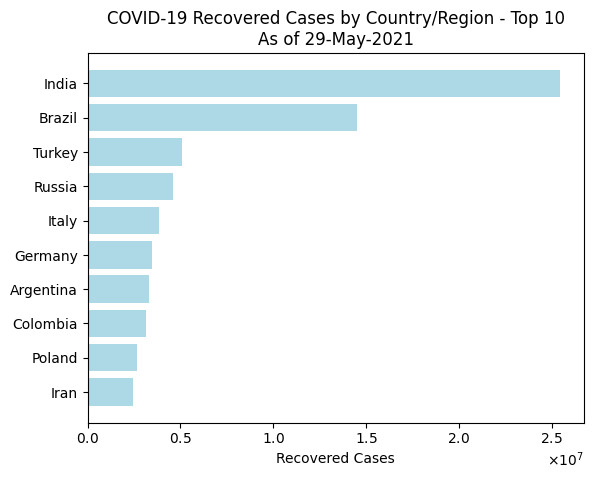

In [ ]:
make_barplots(top_confirmed_df, 'Confirmed Cases')
make_barplots(top_deaths_df, 'Deaths')
make_barplots(top_recovered_df, 'Recovered Cases')

In [ ]:
def new_top_plots(df, title='Cases'):
    # Transpose the DataFrame
    transposed_df = df.copy()
    transposed_df.set_index('Country/Region', inplace=True)
    transposed_df = transposed_df.T

    # Calculate the differences
    diff_df = transposed_df.diff()

    # Get the number of columns
    num_columns = len(diff_df.columns)

    # Create subplots with a grid layout
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each column and plot a line chart in the corresponding subplot
    for i, (column, ax) in enumerate(zip(diff_df.columns, axes)):
        diff_df[column].plot(ax=ax, kind='line').set_ylim(bottom=0.)
        ax.set_xlabel(f'{column} - {transposed_df[column]["5/29/21"]}')  # Set the y-axis label as the column name
        ax.xaxis.set_label_coords(0.5, 1.1)  # Set the x-axis label position above the subplot

    # Set common labels and title
    fig.suptitle(f'COVID-19 New {title} - Top 10 Countries')
    fig.supxlabel('As of 29-May-2021')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Remove empty subplots if there are any
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

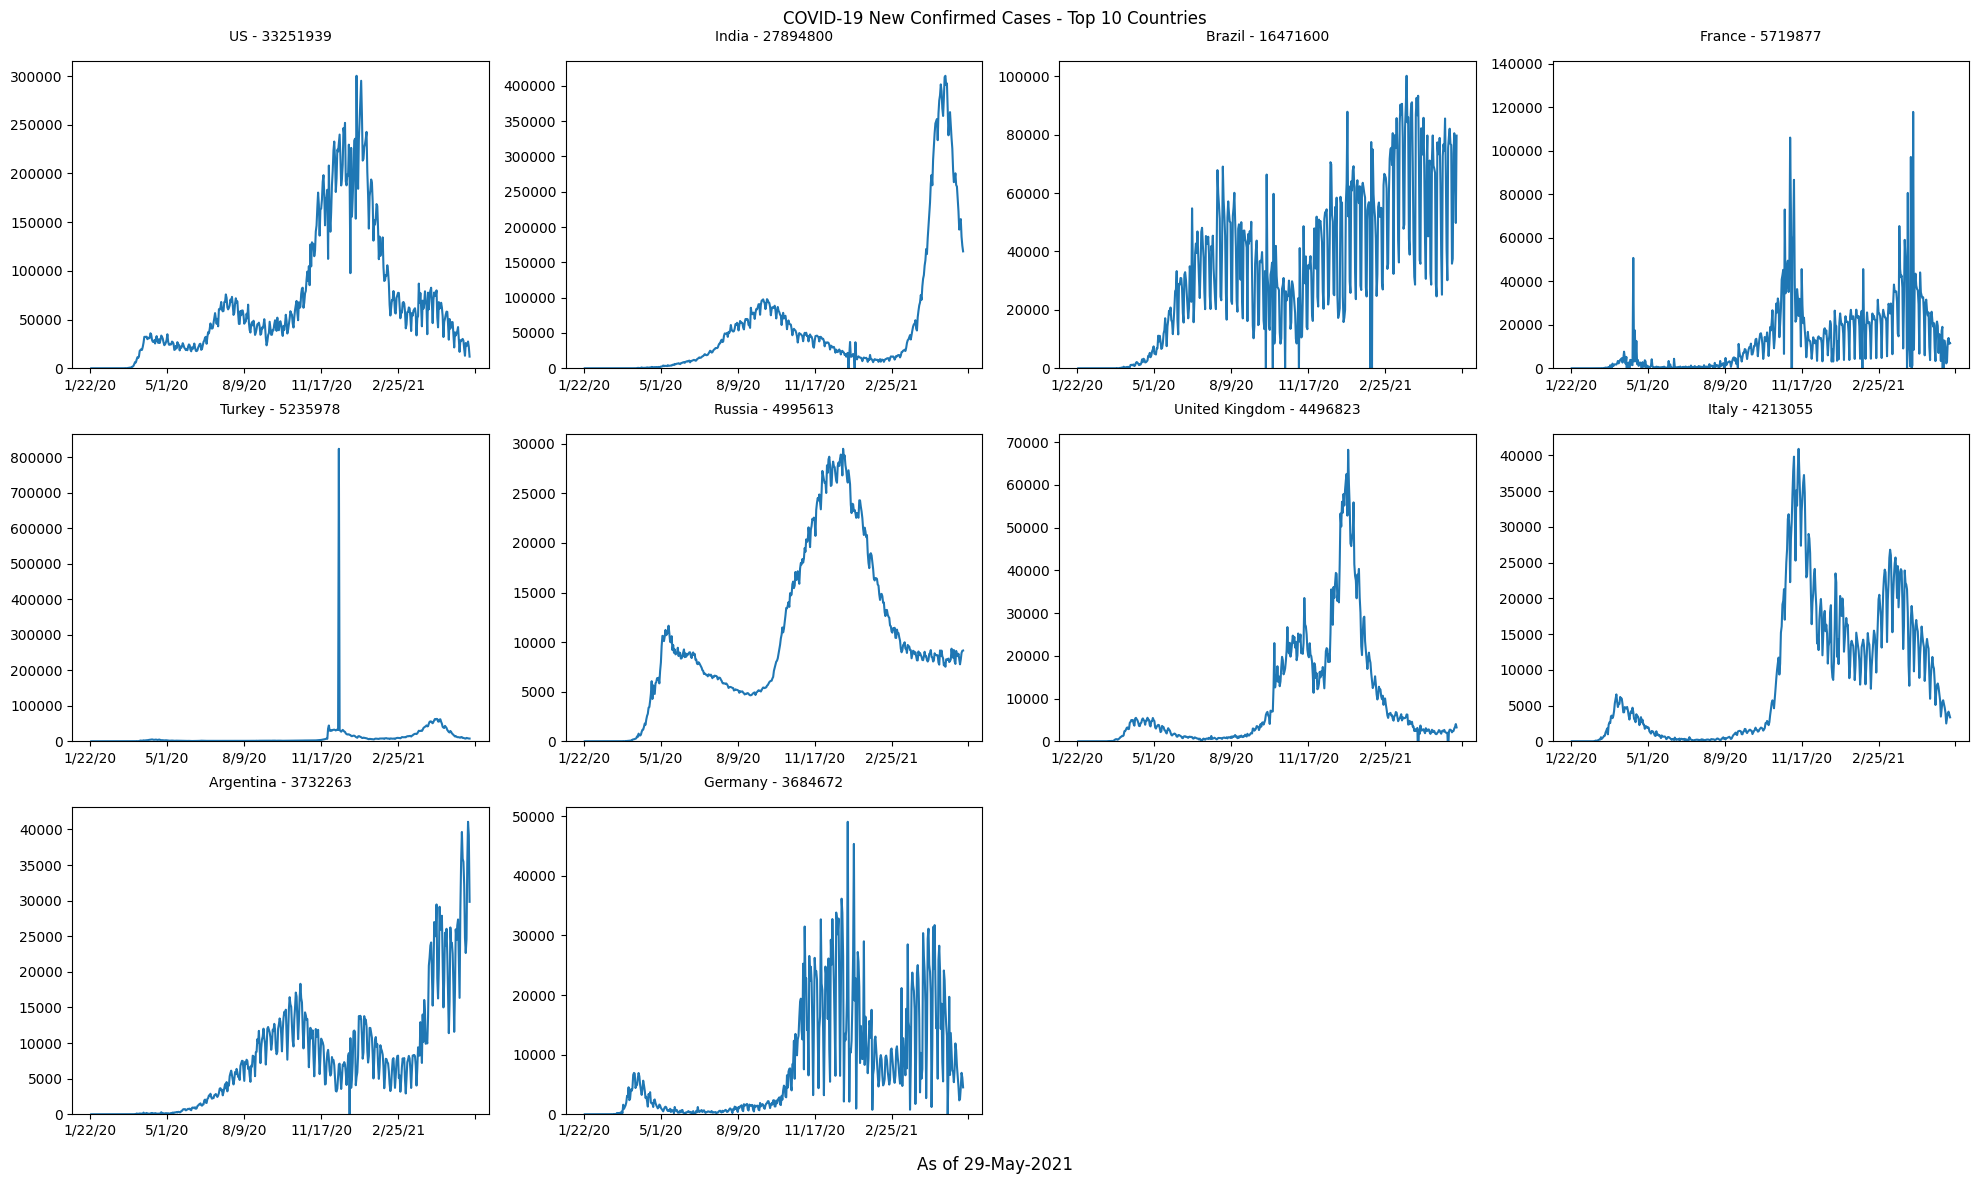

In [ ]:
new_top_plots(top_confirmed_df, 'Confirmed Cases')
# new_top_plots(top_deaths_df, 'Deaths')
# new_top_plots(top_recovered_df, 'Recovered Cases')

In [ ]:
def detect_waves(df, title='Cases', smooth_window=7, peak_threshold=0.05):
    # Transpose the DataFrame
    transposed_df = df.copy()
    transposed_df.set_index('Country/Region', inplace=True)
    transposed_df = transposed_df.T

    # Calculate the differences
    diff_df = transposed_df.diff()

    # Smooth the data using a moving average
    smoothed_df = diff_df.rolling(window=smooth_window).mean()

    # Get the number of columns
    num_columns = len(smoothed_df.columns)

    # Create subplots with a grid layout
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each column and plot a line chart in the corresponding subplot
    for i, (column, ax) in enumerate(zip(smoothed_df.columns, axes)):
        smoothed_data = smoothed_df[column]

        # Find peaks and valleys
        peaks, _ = find_peaks(smoothed_data, height=peak_threshold * np.max(smoothed_data))

        # Count the number of waves
        num_waves = len(peaks)
        ax.set_title(f'{column} - Waves: {num_waves}')

        # Plot the data and highlight peaks and valleys
        smoothed_data.plot(ax=ax, kind='line').set_ylim(bottom=0.)
        ax.plot(peaks, smoothed_data.iloc[peaks], 'ro')

    # Set common labels and title
    fig.suptitle(f'COVID-19 New {title} - Top 10 Countries')
    fig.supxlabel('As of 29-May-2021')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Remove empty subplots if there are any
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

    # Show the plot
    plt.show()

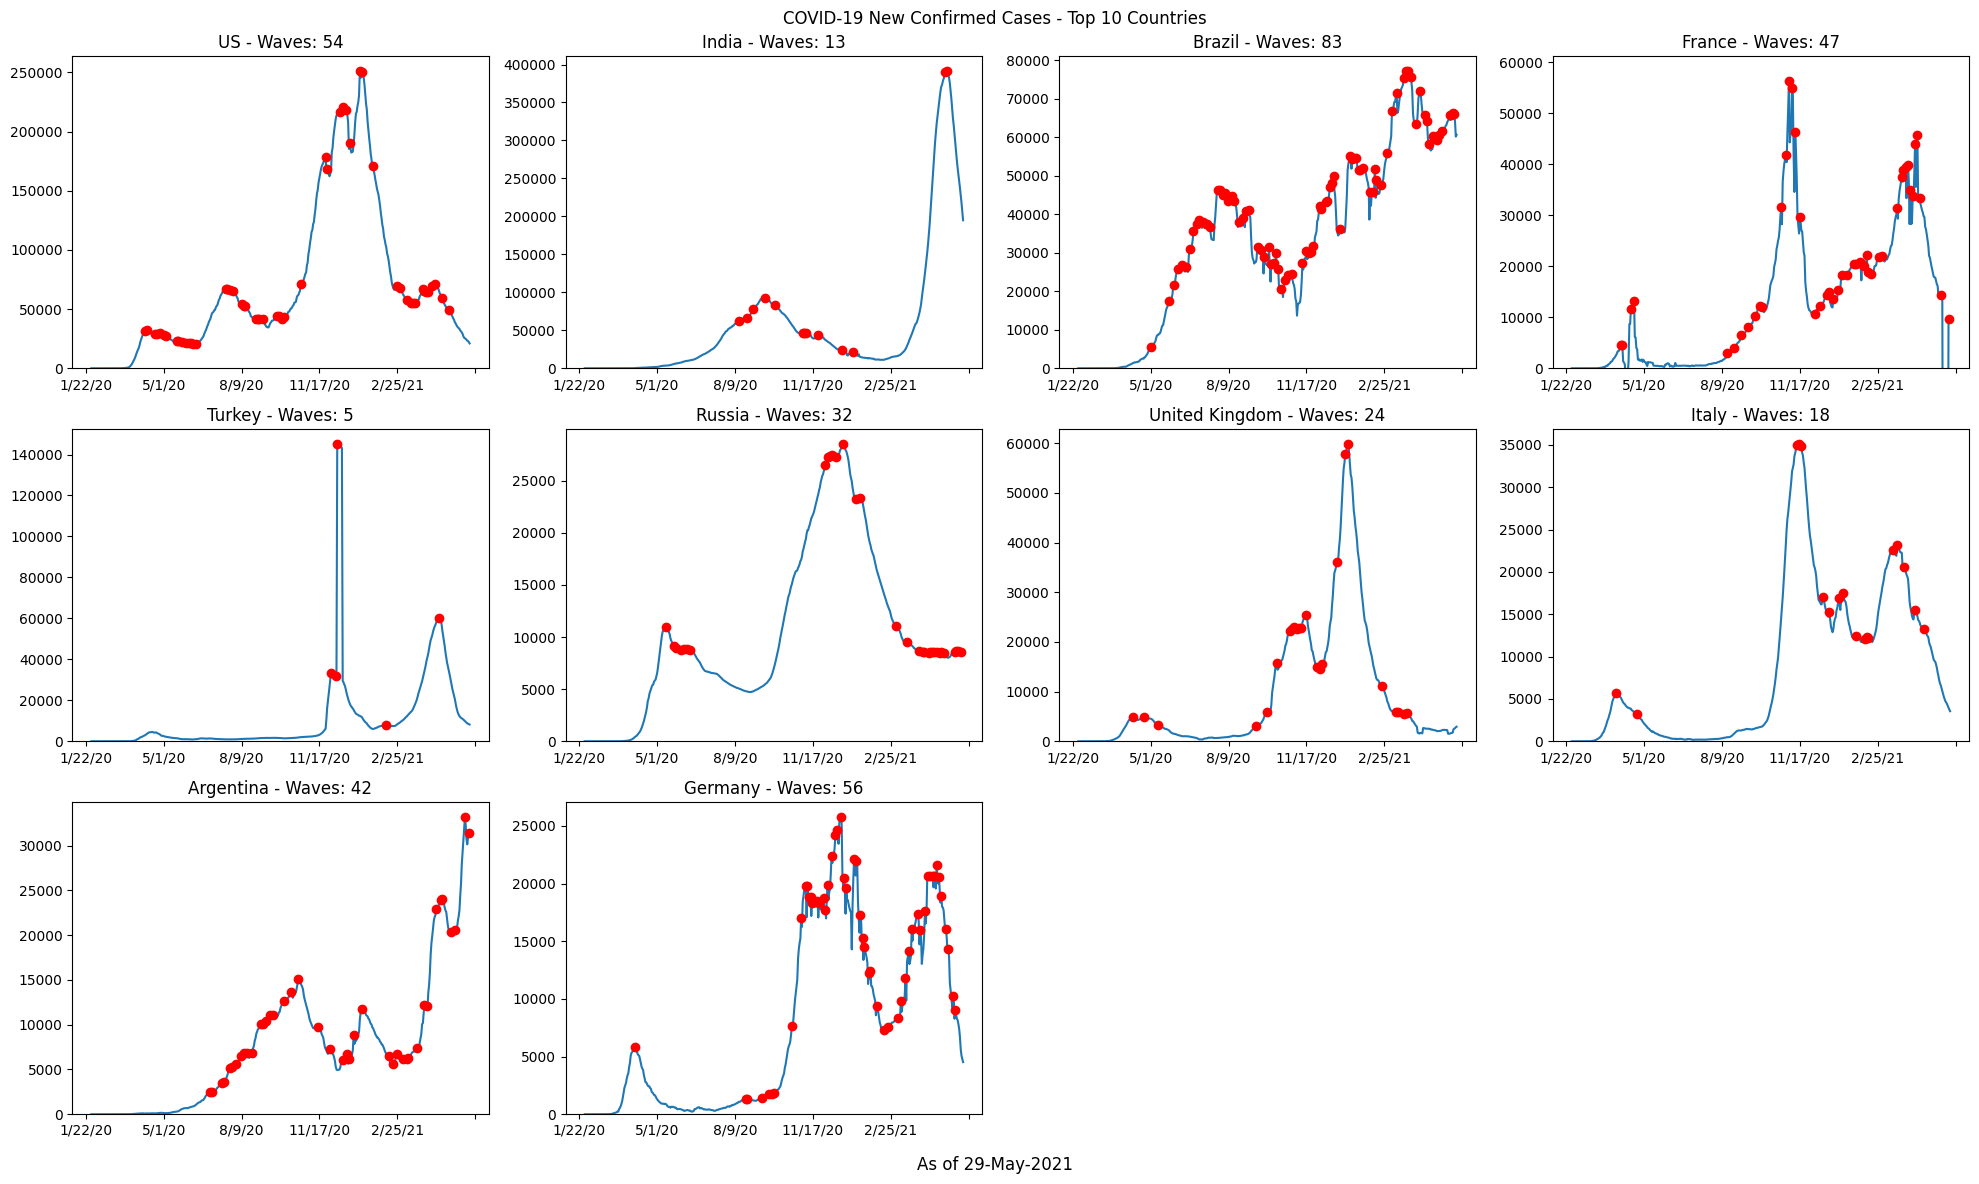

In [ ]:
detect_waves(top_confirmed_df, 'Confirmed Cases')
# detect_waves(top_deaths_df, 'Deaths')
# detect_waves(top_recovered_df, 'Recovered Cases')